In [1]:
import matplotlib
matplotlib.use('Agg')
from matplotlib import gridspec
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.font_manager as font_manager

import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import inspect
import pandas as pd
import copy
import seaborn as sns

import matplotlib
import matplotlib.font_manager as font_manager
font_dirs = ['/mnt/e/Misc/Python_Fonts', ]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
matplotlib.rcParams['font.family'] = 'tahoma'
from matplotlib.colors import Normalize
from matplotlib import cm

from scipy.interpolate import CubicSpline
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import make_lsq_spline
from scipy.interpolate import LSQUnivariateSpline
from scipy.stats.mstats import gmean

from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook
%matplotlib inline
#%pylab

from matplotlib.colors import Normalize
from matplotlib import cm
import matplotlib.patches as patches

In [2]:
adata = sc.read('/mnt/e/MPIMG/Elkabetz/data/scrna/d50_organoids/cortical_cells_experiment1_counts_matrix.csv')

In [3]:
sc.pp.normalize_total(adata)
adata.X = np.log(adata.X+1)

In [4]:
cell_ident_df = pd.read_csv("/mnt/e/MPIMG/Elkabetz/scrna/d50_organoids/experiment1_cortical_cell_identities.tsv",sep='\t')
cell_ident_df.index =cell_ident_df['cell']
adata.obs['cluster'] = cell_ident_df.loc[adata.obs.index]['cluster'].astype('category')
adata.obs['Index'] = range(len(adata.obs))

In [5]:
bin_arr = adata.X > 0
gene_list = list(adata.var.index)

In [6]:
sns.set_style('white')

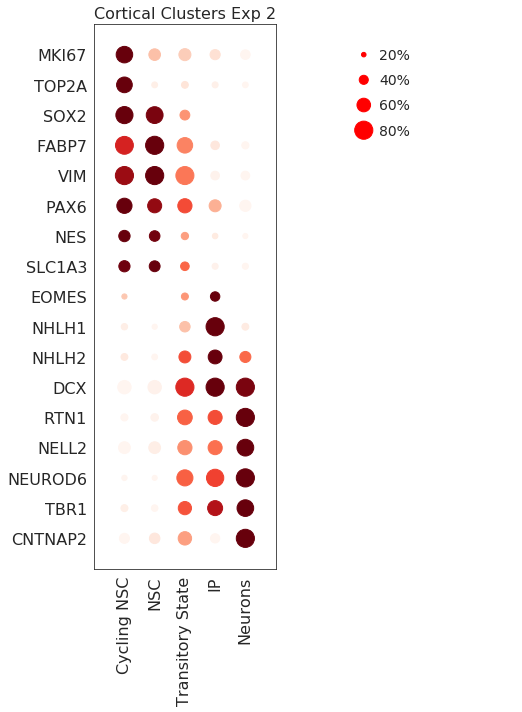

In [18]:
clusts = [2,1,5,3,4]
genes = ['MKI67','TOP2A','SOX2','FABP7','VIM','PAX6','NES','SLC1A3',
        'EOMES','NHLH1','NHLH2','DCX','RTN1','NELL2','NEUROD6','TBR1',
        'CNTNAP2']

plt.figure(figsize=(8,10))
ax = plt.subplot(121)
max_expr_val = 0.8
min_expr_val = 0.2
max_s = 0.3

colormap = cm.Reds
normed_cmap = Normalize(vmin=0,vmax=1)

for i,gene in enumerate(genes):
    gene_idx = gene_list.index(gene)
    n_exprs = []
    expr_vals = []
    n_cells = []
    for clust in clusts:
        clust_cells = adata.obs[adata.obs['cluster']==clust]['Index']
        n_expr = sum(bin_arr[np.array(clust_cells),gene_idx])
        expr_val = np.mean(adata.X[np.array(clust_cells),gene_idx])
        expr_vals.append(expr_val)
        n_exprs.append(n_expr)
        n_cells.append(len(clust_cells))
    expr_vals_norm = [x-min(expr_vals) for x in expr_vals]
    expr_vals_norm = [x/max(expr_vals_norm) for x in expr_vals_norm]
    for j,clust in enumerate(clusts):
        color = tuple(np.array(colormap(normed_cmap(expr_vals_norm[j]),bytes=True))/255.)
        if n_exprs[j]/float(n_cells[j]) < min_expr_val: continue
        p = patches.Circle((j,-i), radius=min(max_expr_val,n_exprs[j]/float(n_cells[j]))/max_expr_val*max_s,
                          color=color)
        #p.set_edgecolor('black')
        #p.set_linewidth(0.5)
        ax.add_patch(p)

plt.yticks(range(0,-i-1,-1),genes,fontsize=16)
plt.axis('square')
plt.xlim(-1,len(clusts))
plt.ylim(-len(genes),1)
plt.xticks([0,1,2,3,4],['Cycling NSC','NSC','Transitory State','IP','Neurons'],rotation=90,fontsize=16)
plt.title('Cortical Clusters Exp 2',fontsize=16)
plt.tight_layout()

ax = plt.subplot(122)
for j,(perc_,lab_) in enumerate(zip([0.2,0.4,0.6,0.8],['20%','40%','60%','80%'])):
    p = patches.Circle((0,-j/1.2), radius=min(max_expr_val,perc_)/max_expr_val*max_s,
                          color='red')
    plt.annotate(lab_,xy=(0.5,-j/1.2-0.15),fontsize=14)
    #p.set_edgecolor('black')
    #p.set_linewidth(0.5)
    ax.add_patch(p)
plt.axis('off')
plt.axis('square')
plt.xlim(-1,len(clusts))
plt.ylim(-len(genes),1)

plt.savefig('/mnt/e/MPIMG/Elkabetz/Mutukula_etal_Paper/Figures/OSVZ_figure/dot_plot_no_edges.exp2.pdf')
plt.show()